**Support Vector Regression (SVR)**

Load and Explore the Dataset

In [2]:
import pandas as pd
df=pd.read_csv('milk_production.csv')
df.head()

,Temperature_C,Milk_Production_Liters
0,10,12
1,12,15
2,15,18
3,18,22
4,20,24


In [3]:
df.describe()

,Temperature_C,Milk_Production_Liters
count,12.000000,12.000000
mean,23.750000,19.166667
std,9.096703,4.932883
min,10.000000,12.000000
25%,17.250000,15.000000
50%,23.500000,19.000000
75%,30.500000,23.250000
max,38.000000,26.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Temperature_C           12 non-null     int64
 1   Milk_Production_Liters  12 non-null     int64
dtypes: int64(2)
memory usage: 324.0 bytes


In [7]:
df.isnull().sum()

,0
Temperature_C,0
Milk_Production_Liters,0


In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Temperature_C           12 non-null     int64
 1   Milk_Production_Liters  12 non-null     int64
dtypes: int64(2)
memory usage: 324.0 bytes


**Feature Scaling (Very Important for SVR)**

In [12]:
from sklearn.preprocessing import StandardScaler

x=df[['Temperature_C']].values
y=df[['Milk_Production_Liters']].values

sc_x=StandardScaler()
sc_y=StandardScaler()

x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y)

Flatten y for SVR

In [13]:
y_scaled

array([[-1.51743705],
       [-0.88223084],
       [-0.24702464],
       [ 0.59991697],
       [ 1.02338778],
       [ 1.44685858],
       [ 1.23512318],
       [ 0.81165237],
       [ 0.17644617],
       [-0.24702464],
       [-0.88223084],
       [-1.51743705]])

In [14]:
y_scaled = y_scaled.ravel()


In [15]:
y_scaled

array([-1.51743705, -0.88223084, -0.24702464,  0.59991697,  1.02338778,
        1.44685858,  1.23512318,  0.81165237,  0.17644617, -0.24702464,
       -0.88223084, -1.51743705])

Train SVR Model (RBF Kernel)


In [16]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(x_scaled, y_scaled)

SVR(C=100)

Predictions and Inverse Scaling

In [17]:
y_pred_scaled = svr.predict(x_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

Visualization: Actual vs Predicted

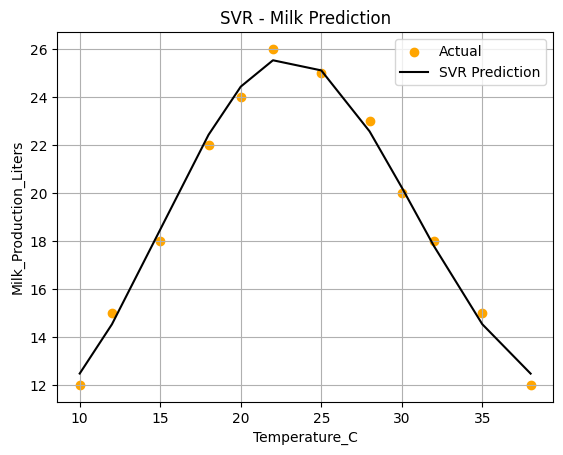

In [19]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='orange', label='Actual')
plt.plot(x, y_pred, color='black', label='SVR Prediction')
plt.title("SVR - Milk Prediction")
plt.xlabel("Temperature_C")
plt.ylabel("Milk_Production_Liters")
plt.grid(True)
plt.legend()
plt.show()

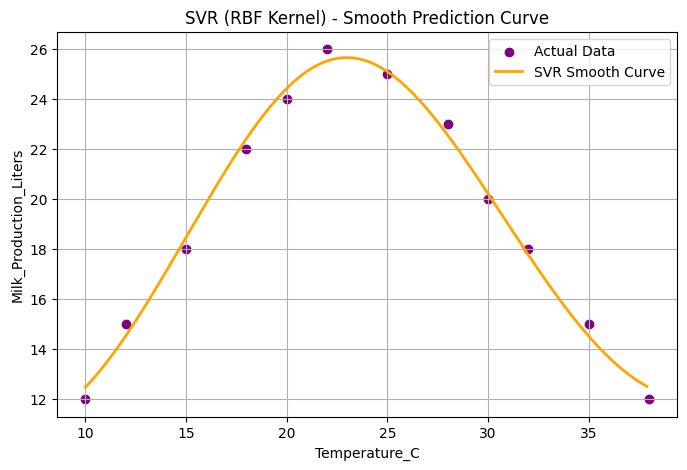

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Create a fine grid between min and max YearsExperience
x_grid = np.arange(min(x.ravel()), max(x.ravel()), 0.1)
x_grid = x_grid.reshape(-1, 1)

# Scale X_grid just like training data
x_grid_scaled = sc_x.transform(x_grid)

# Predict on the grid and inverse transform the results
y_grid_scaled = svr.predict(x_grid_scaled)
y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1, 1))

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='purple', label='Actual Data')
plt.plot(x_grid, y_grid, color='orange', label='SVR Smooth Curve', linewidth=2)
plt.title("SVR (RBF Kernel) - Smooth Prediction Curve")
plt.xlabel("Temperature_C")
plt.ylabel("Milk_Production_Liters")
plt.grid(True)
plt.legend()
plt.show()

Evaluate Model Performance

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 0.16709917813503403
RMSE: 0.408777663449257
R² Score: 0.9925086296228378


**Understanding and Comparing Kernels**

Compare Kernels Using Code

Kernel: LINEAR | R² Score: -0.0221


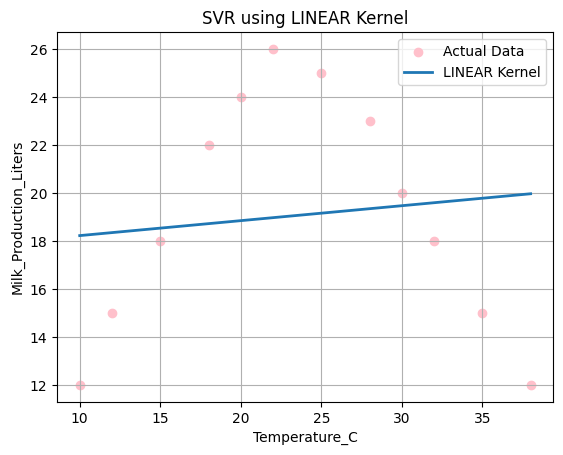

Kernel: POLY | R² Score: 0.9448


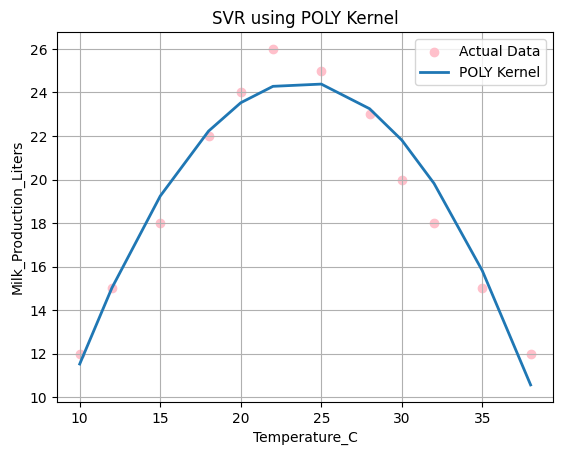

Kernel: RBF | R² Score: 0.9691


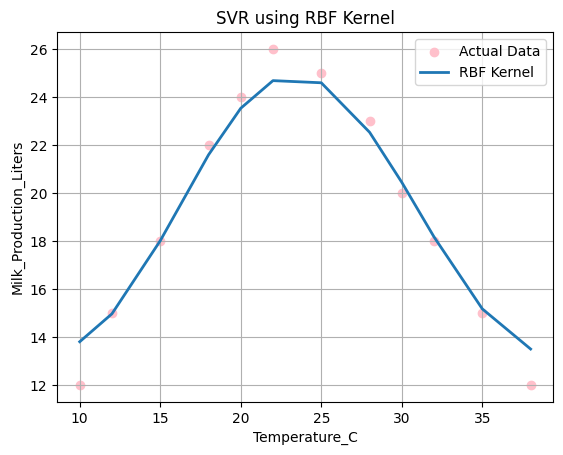

In [26]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. Load and scale data
x = df[['Temperature_C']].values
y = df[['Milk_Production_Liters']].values

sc_x = StandardScaler()
sc_y = StandardScaler()

x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y).ravel()  # flatten y

# 2. Define kernels
kernels = ['linear', 'poly', 'rbf']

# 3. Train and evaluate each kernel
for kernel in kernels:
    if kernel == 'poly':
        model = SVR(kernel=kernel, degree=2)
    else:
        model = SVR(kernel=kernel)

    model.fit(x_scaled, y_scaled)

    # Predict for training data
    y_pred_scaled = model.predict(x_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

    # Evaluation
    score = r2_score(y, y_pred)
    print(f"Kernel: {kernel.upper()} | R² Score: {score:.4f}")

    # Plot (optional)
    plt.scatter(x, y, color='pink', label='Actual Data')
    plt.plot(x, y_pred, label=f'{kernel.upper()} Kernel', linewidth=2)
    plt.title(f'SVR using {kernel.upper()} Kernel')
    plt.xlabel("Temperature_C")
    plt.ylabel("Milk_Production_Liters")
    plt.grid(True)
    plt.legend()
    plt.show()


**Deep Dive: Understanding C and epsilon in SVR**

In [27]:
SVR(C=1)   # simpler, general model
SVR(C=100) # more complex, strict

SVR(C=100)

In [28]:
SVR(epsilon=0.1)  # more precise
SVR(epsilon=1.0)  # more tolerant

SVR(epsilon=1.0)

Try Different C and epsilon Values

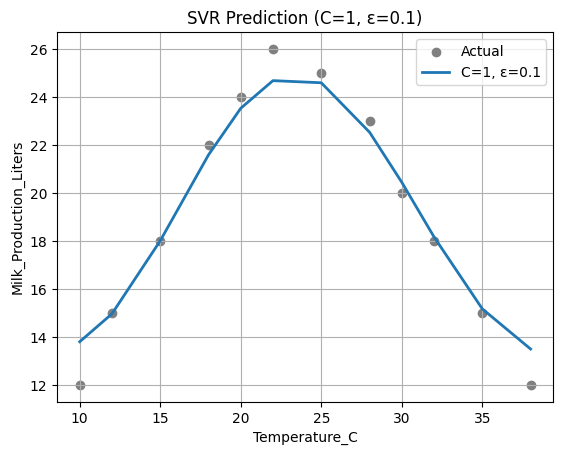

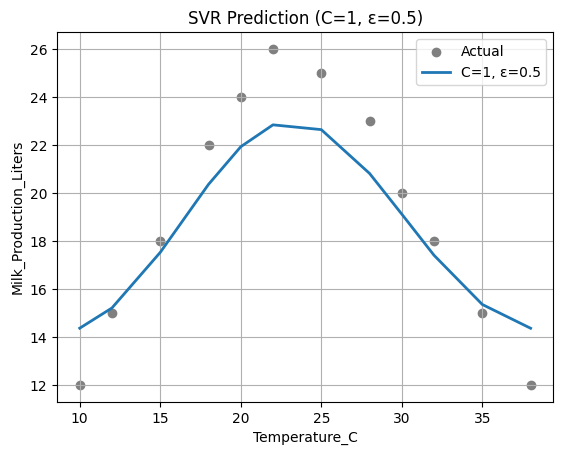

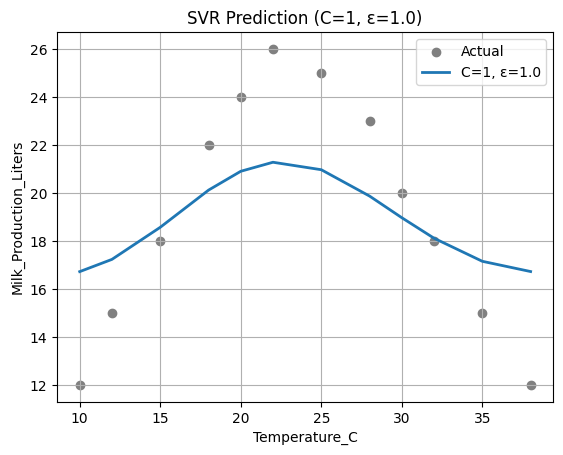

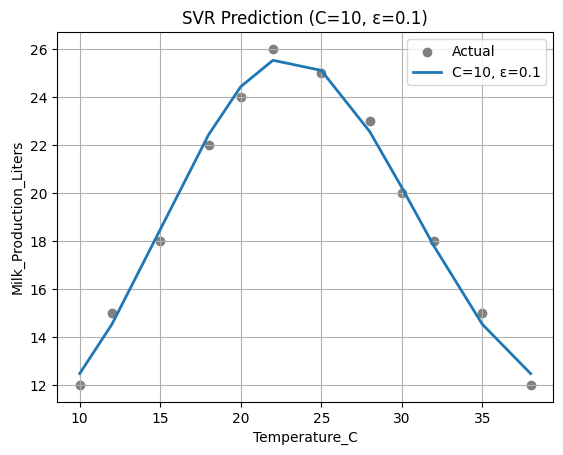

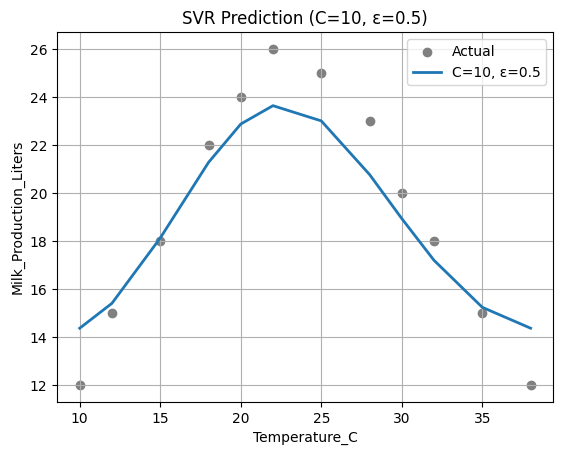

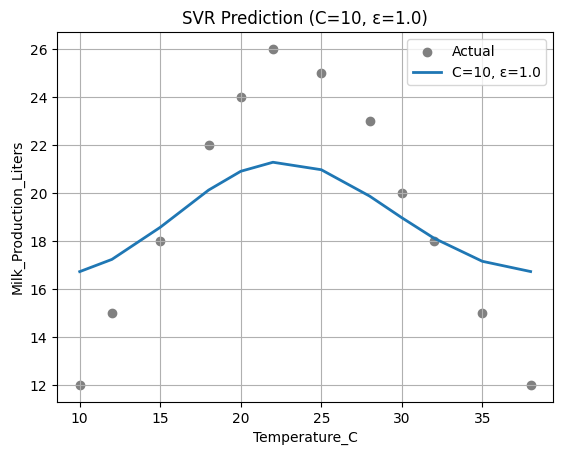

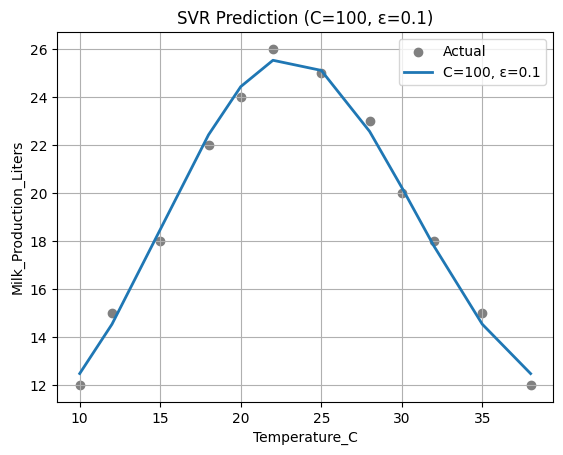

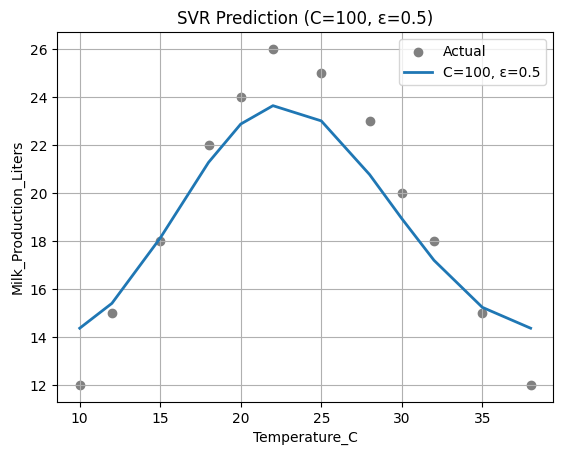

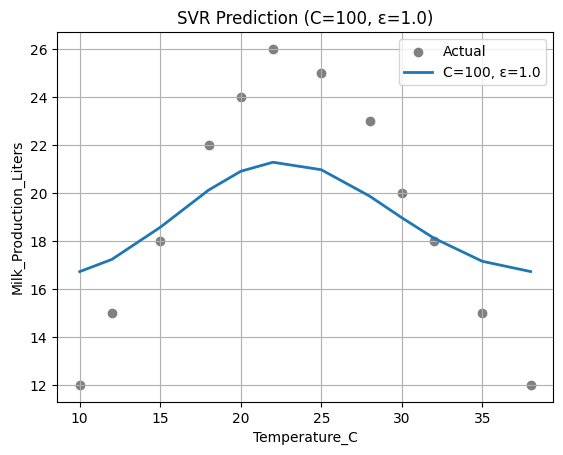

In [29]:
C_values = [1, 10, 100]
epsilon_values = [0.1, 0.5, 1.0]

for c in C_values:
    for eps in epsilon_values:
        model = SVR(kernel='rbf', C=c, epsilon=eps)
        model.fit(x_scaled, y_scaled)
        y_pred = sc_y.inverse_transform(model.predict(x_scaled).reshape(-1, 1))

        plt.scatter(x, y, color='gray', label='Actual')
        plt.plot(x, y_pred, label=f'C={c}, ε={eps}', linewidth=2)
        plt.title(f'SVR Prediction (C={c}, ε={eps})')
        plt.xlabel("Temperature_C")
        plt.ylabel("Milk_Production_Liters")
        plt.legend()
        plt.grid(True)
        plt.show()

Real-World Prediction

In [30]:
exp = [[6.5]]
exp_scaled = sc_x.transform(exp)
Milk_Production_Liters_scaled = svr.predict(exp_scaled)
Milk_Production_Liters = sc_y.inverse_transform(Milk_Production_Liters_scaled.reshape(-1, 1))

print(f"Predicted Milk_Production_Liters for 6.5 years: ₹{Milk_Production_Liters[0][0]:,.2f}")

Predicted Milk_Production_Liters for 6.5 years: ₹10.89
